In [1]:
import os 
import json
import pandas as pd
import plotly.express as px

In [2]:
from causalimpact import CausalImpact

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# us - china
with open('yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df['date'] = pd.to_datetime(df['date'])

fig = px.line(df, x='date', y='sentiment_score', 
              title='Yearly Average Sentiment Score', 
              labels={'date': 'Date', 'sentiment_score': 'Sentiment Score'},
              markers=dict(size=5, color='#000000', symbol='circle', line=dict(width=1, color='#000000')))


# Show the plot
fig.show()

In [4]:
# us - canada
with open('canada_yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df2 = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df2['date'] = pd.to_datetime(df2['date'])
df2['relations'] = 'US-Canada' 

fig = px.line(df2, x='date', y='sentiment_score', 
              title='Yearly Average Sentiment Score (Canada)', 
              labels={'date': 'Date', 'sentiment_score': 'Sentiment Score'},
              markers=dict(size=5, color='#000000', symbol='circle', line=dict(width=1, color='#000000')))

# Show the plot
fig.show()

In [5]:
combined_df = pd.concat([df, df2])

fig = px.line(combined_df, x='date', y='sentiment_score', color='relations',
              title='US-China and US-Canada Yearly Average Sentiment Scores',
              labels={'date': 'Year', 'sentiment_score': 'Sentiment Score', 'relations': 'relations'},
              markers=True)

fig.update_layout(
    xaxis=dict(
        tickmode='linear',
        tick0=0,
        dtick=1
    )
)

fig.show()

In [16]:
# combine dataframe
date_range = pd.date_range(start="1969", periods=len(df), freq='Y')
data = df['sentiment_score'].values
data_frame= pd.DataFrame(data, columns=['us-china'])
data2 = df2['sentiment_score'].values
data_frame['us-canada'] = data2
data_frame.index = date_range
data_frame.tail(10)

,us-china,us-canada
2015-12-31,3.35,3.46
2016-12-31,3.19,3.93
2017-12-31,2.99,3.49
2018-12-31,2.81,3.12
2019-12-31,2.69,3.35
2020-12-31,2.50,2.92
2021-12-31,2.92,3.20
2022-12-31,2.89,3.15
2023-12-31,2.79,3.47
2024-12-31,2.78,3.26


In [17]:
# trump won the president election in 2016
pre_period = [pd.to_datetime('1969-12-31'), pd.to_datetime('2015-12-31')]
post_period = [pd.to_datetime('2016-12-31'), pd.to_datetime('2024-12-31')]

impact = CausalImpact(data_frame, pre_period, post_period)
impact.run()

c:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [18]:
impact.inferences.tail(5)

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
2020-12-31,2.50,165.88,3.292399,2.562744,4.022055,167.961483,-460.846989,796.769954,-0.792399,-0.062744,-1.522055,-2.533626,0.490447,-5.557698
2021-12-31,2.92,168.80,3.324280,2.542395,4.106165,171.285762,-458.304594,800.876119,-0.404280,0.377605,-1.186165,-2.937905,0.868052,-6.743863
2022-12-31,2.89,171.69,3.318587,2.487749,4.149425,174.604349,-455.816845,805.025544,-0.428587,0.402251,-1.259425,-3.366492,1.270303,-8.003288
2023-12-31,2.79,174.48,3.355022,2.477959,4.232085,177.959371,-453.338886,809.257628,-0.565022,0.312041,-1.442085,-3.931514,1.582344,-9.445372
2024-12-31,2.78,177.26,3.331111,2.410141,4.252082,181.290483,-450.928745,813.509710,-0.551111,0.369859,-1.472082,-4.482626,1.952203,-10.917454


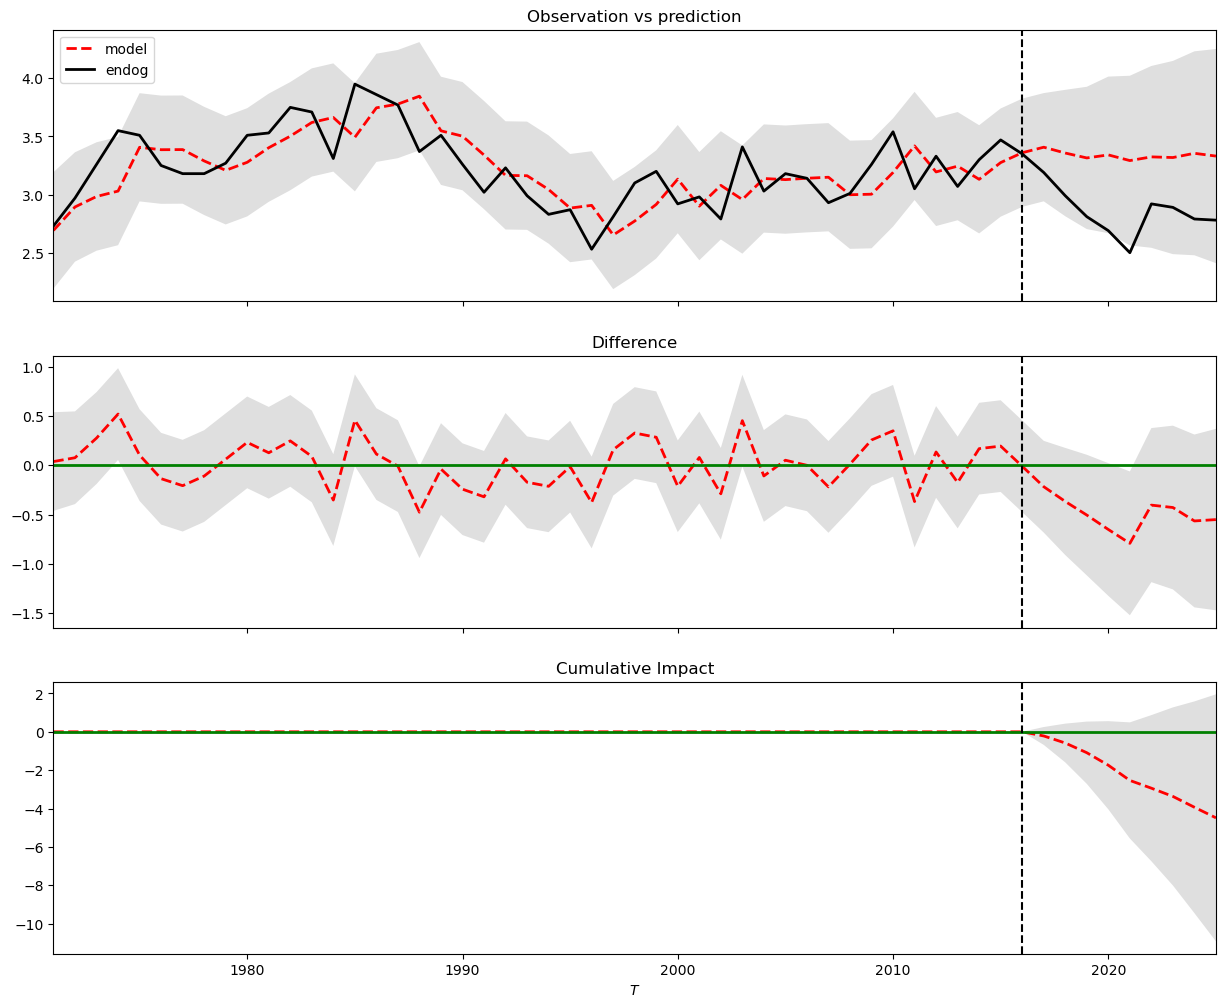

In [10]:
# # 画出因果影响分析结果
impact.plot()

In [11]:
impact.summary()

                               Average      Cumulative
Actual                               2              25
Predicted                            3              30
95% CI                          [2, 4]        [23, 36]
                                                      
Absolute Effect                      0              -4
95% CI                         [0, -1]        [1, -10]
                                                      
Relative Effect                 -14.9%          -14.9%
95% CI                  [6.5%, -36.3%]  [6.5%, -36.3%]
                                                      
P-value                           0.0%                
Prob. of Causal Effect          100.0%                


In [11]:
impact.summary(output='report')

During the post-intervention period, the response             variable had an average value of             approx. 2.
By contrast, in  the absence of an intervention, we would have expected an average response of 3. The 95% interval of
this counterfactual prediction is [2, 4]. Subtracting this prediction from the observed response yields an estimate of
the causal effect the intervention had on the response variable. This effect is 0 with a 95% interval of [0, -1]. For a
discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 25.  By contrast, had  the intervention not taken place, we
would have expected a sum of 30. The 95% interval of this prediction is [23, 36]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  a decrease
of  -14.9%. The 95% interv